In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

# adds scripts/ and src/ folder: so you can import scripts/functions across project steps
import sys 
sys.path.append("../../src")
sys.path.append("../../scripts")

# import data filepath we want to use
from data_filepaths import all_data_info, portraits_csv

In [2]:
df = pd.read_csv(all_data_info)

In [3]:
y = []
def correct_date(x):
    try:
        return float(str(x).replace('c.', ''))
    except ValueError:
        return np.nan

In [45]:
df['date'] = df['date'].apply(correct_date)

In [46]:
df.head()

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename,correcteddate
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg,1955.0
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg,1950.0
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg,2013.0
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg,2013.0
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg,2013.0


In [6]:
sum([z<1800 for z in y])

0

In [7]:
df.genre.value_counts()
# portrait
# self-portrait

portrait                    16847
landscape                   15006
genre painting              14260
abstract                     9498
religious painting           7429
cityscape                    5348
sketch and study             3644
illustration                 3202
still life                   3132
symbolic painting            2545
nude painting (nu)           2290
figurative                   2244
design                       2024
mythological painting        1910
marina                       1805
flower painting              1606
animal painting              1571
self-portrait                1531
allegorical painting         1034
history painting              879
interior                      670
literary painting             558
battle painting               358
wildlife painting             327
poster                        286
capriccio                     236
veduta                        233
caricature                    231
cloudscape                    208
tessellation  

In [8]:
len(df.loc[(df.genre.isin(['portrait', 'self-portrait']))&(df.correcteddate<1800)])

3134

In [9]:
len(df.loc[df.genre.isin(['portrait', 'self-portrait'])])
len(df.loc[df.genre.isin(['portrait'])])

16847

<AxesSubplot:>

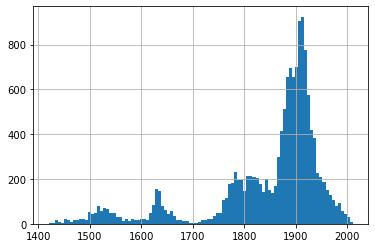

In [10]:
df.loc[(df.genre.isin(['portrait', 'self-portrait']))].correcteddate.hist(bins=100)

In [22]:
df.loc[(df.genre.isin(['portrait', 'selfportrait']))].sort_values('correcteddate')[2200:2240]

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename,correcteddate
83149,Joshua Reynolds,1776,portrait,425.0,700.0,33933.0,wikiart,Rococo,"George John Spencer, 2nd Earl Spencer",train_and_test,False,24234.jpg,1776.0
76772,Joshua Reynolds,1776,portrait,474.0,778.0,56999.0,wikiart,Rococo,"Catherine, Lady Bampfylde",train_and_test,True,70683.jpg,1776.0
99219,Jean-Honore Fragonard,1776,portrait,360.0,504.0,132855.0,wikiart,Rococo,The little sultan,train_only,True,13688.jpg,1776.0
7579,Jean-Honore Fragonard,c.1776,portrait,1679.0,2100.0,712096.0,wikipedia,Rococo,A Young Girl Reading,train_only,True,57507.jpg,1776.0
76910,Joshua Reynolds,1776,portrait,469.0,782.0,56164.0,wikipedia,Rococo,Lady Worsley,train_and_test,True,101828.jpg,1776.0
2159,Thomas Gainsborough,1776,portrait,2400.0,2928.0,2617445.0,wikiart,Rococo,Portrait of Johann Christian Bach,train_and_test,True,37109.jpg,1776.0
78037,Joshua Reynolds,1776,portrait,456.0,773.0,47939.0,wikiart,Rococo,Mrs. Richard Bennett Lloyd,train_and_test,True,46098.jpg,1776.0
4102,Benjamin West,1776,portrait,2044.0,2560.0,881828.0,wikiart,Rococo,Queen Charlotte,train_and_test,False,1794.jpg,1776.0
63570,George Romney,1776.0,portrait,637.0,800.0,65081.0,wikiart,Rococo,Richard Cumberland,train_and_test,True,71811.jpg,1776.0
81084,Joshua Reynolds,1776,portrait,499.0,637.0,26253.0,wikipedia,Rococo,Lady Caroline Scott as Winter,train_and_test,True,60830.jpg,1776.0


In [47]:
portraits = df.loc[(df.genre.isin(['portrait', 'self-portrait']))].sort_values('correcteddate')

In [48]:
portraits.shape

(18378, 13)

In [49]:
len(portraits.artist.unique())

1092

In [50]:
portraits["style"].value_counts().to_csv("styles.csv")

In [51]:
portraits.to_csv(portraits_csv)

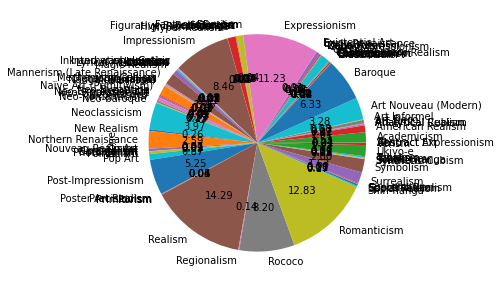

In [60]:
portraits.groupby('style').size().plot(kind='pie', autopct='%.2f');

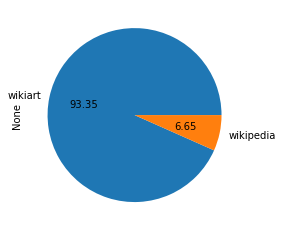

In [53]:
portraits.groupby('source').size().plot(kind='pie', autopct='%.2f');

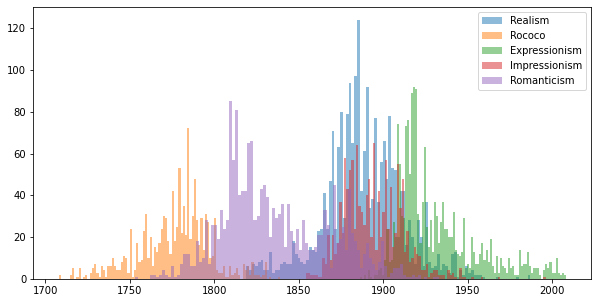

In [59]:
plt.figure(figsize=(10,5))
plt.hist(portraits[portraits["style"]=="Realism"].date,bins=100, alpha=0.5)
plt.hist(portraits[portraits["style"]=="Rococo"].date,bins=100, alpha=0.5)
plt.hist(portraits[portraits["style"]=="Expressionism"].date,bins=100, alpha=0.5)
plt.hist(portraits[portraits["style"]=="Impressionism"].date,bins=100, alpha=0.5)
plt.hist(portraits[portraits["style"]=="Romanticism"].date,bins=100, alpha=0.5)
plt.legend(['Realism', 'Rococo','Expressionism','Impressionism','Romanticism'])
plt.show()

In [64]:
import os
path = "../../data/painter_nationality"
nationality = pd.DataFrame()
for filename in os.listdir(path):
    f = os.path.join(path, filename)
    # checking if it is a file
    if os.path.isfile(f):
        print(filename)
    if f.endswith(".json"):
        df = pd.read_json(f)
        nationality = pd.concat([nationality, df])

ireland.json
brazil.json
denmark.json
sweden.json
italy.json
germany.json
japan.json
usa.json
norway.json
austria.json
switzerland.json
turkey.json
portugal.json
romania.json
finland.json
poland.json
hungary.json
france.json
greece.json
ukraine.json
britain.json
spain.json
netherlands.json
belgium.json
russia.json
china.json


In [66]:
import unicodedata

def strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [67]:
nationality = nationality.rename(columns={"painterLabel": "artist", "countryLabel": "nationality"})
nationality["artist"] = nationality["artist"].apply(strip_accents)
nationality.head()

,artist,nationality
0,Elizabeth Gray,Australia
1,Jon Campbell,Australia
2,Sean Rudman,Canada
3,David Moore,Canada
4,Thomas Frye,England


In [68]:
portraits = portraits.merge(nationality, on='artist', how='left')

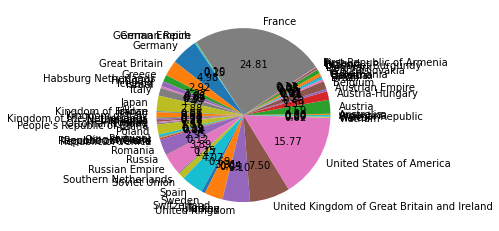

In [69]:
portraits.groupby('nationality').size().plot(kind='pie', autopct='%.2f');